# WeatherPy

# Observable Trends and Insights----

## 1. The findings of these analyses show that there are higher temperatures for cities that are found nearest to the equator (Latitude 0), however, when we go further from the equator towards the north the temperature decreases significantly. And as we travel south the temperature decreases and is much lower comparing to the north. The regression analysis and plots also show that there is a strong negative correlation between temperature, and latitude in the northern hemisphere however, the correlation between temperature and latitude in the south hemisphere is negative but very weak as compared to that of the northern hemisphere.

## 2. The findings from the data, plots, and the regression line in the case of testing whether there is a relation between humidity and cloudiness of cities nearer or further to the equator (latitude 0) doesn't show any significant results. There is a considerably weak correlation between humidity and latitude for cities in both the northern and southern hemisphere, as is the correlation for cloudiness and latitude. So, we can conclude that humidity levels can vary in both northern and southern hemisphere cities regardless of their distance from the equator.

## 3. The finding from the analysis of the relationship between wind speed (mph) and latitude show that a lower wind speed occurs for cities that are closer to the equater (latitude 0), while wind speeds increase in cities further from the equator. The regression analysis also shows that there is a positive, but weak correlation between wind speed (mph (%) and latitude in the northern hemispheric cities.

In [143]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress
import scipy.stats as st

# Import OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine cities based on latitude and longitude
from citipy import citipy

# Generate Cities List using citipy

In [133]:
# Empty lists for holding lat_lngs and cities
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 641


# Perform API Calls

## Perform a weather check on each city using a series of successive API calls
## Include a print log of each city as it's being processed

In [134]:
# Base url and units
url = 'https://api.openweathermap.org/data/2.5/weather?q='
units = 'metric'

# Build Query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [135]:
# Empty list to hold weather data for each city
city_data = []

# Print beginning retrieval log
print("Beginning Data Retrieval                    ")
print("--------------------------------------------")

# Counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city+'&appid='+weather_api_key+'&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add to record count
    record_count += 1
    
    # Run API request on each of the cities for weather data
    
    #print(f"Processing Record {count} of Set {set} | {city}")
    try:
        #Parse JSON and retrieve weather data
        city_weather = requests.get(city_url).json()
        
        # Parse out lat, lon, max temp, humidity, cloudiness, wind speed, country, date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})        
        
    # If an error is experienced, skip the city...
    except:
        print("City not found. Skipping...")
        pass

# Print when Data Retrieval is complete    
print("------------------------------------------------")
print("Data Retrieval Complete                         ")
print("------------------------------------------------")

Beginning Data Retrieval                    
--------------------------------------------
Processing Record 1 of Set 1 | gushikawa
Processing Record 2 of Set 1 | port macquarie
Processing Record 3 of Set 1 | la palma
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | buqayq
City not found. Skipping...
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 9 of Set 1 | humaita
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | ust-kan
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | ostrovnoy
Processing Record 14 of Set 1 | vojens
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | camapua
Processing Record 17 of Set 1 | basoko
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | stolin
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | cher

Processing Record 37 of Set 4 | codrington
Processing Record 38 of Set 4 | kobryn
Processing Record 39 of Set 4 | honiara
Processing Record 40 of Set 4 | bom jesus
Processing Record 41 of Set 4 | chatellerault
Processing Record 42 of Set 4 | thinadhoo
Processing Record 43 of Set 4 | tautira
Processing Record 44 of Set 4 | hithadhoo
Processing Record 45 of Set 4 | mahebourg
Processing Record 46 of Set 4 | hambantota
Processing Record 47 of Set 4 | saint-philippe
Processing Record 48 of Set 4 | tilichiki
Processing Record 49 of Set 4 | santa cruz de la palma
Processing Record 0 of Set 5 | hobyo
Processing Record 1 of Set 5 | camacha
Processing Record 2 of Set 5 | omsukchan
Processing Record 3 of Set 5 | alta floresta
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | kholodnyy
Processing Record 6 of Set 5 | pisco
Processing Record 7 of Set 5 | panjab
Processing Record 8 of Set 5 | severo-kurilsk
Processing Record 9 of Set 5 | marcona
City not found. Skipping...
Proces

Processing Record 24 of Set 8 | maragogi
Processing Record 25 of Set 8 | palmer
Processing Record 26 of Set 8 | yar-sale
Processing Record 27 of Set 8 | santiago de las vegas
Processing Record 28 of Set 8 | san policarpo
Processing Record 29 of Set 8 | balakhta
Processing Record 30 of Set 8 | inhambane
Processing Record 31 of Set 8 | gangoh
Processing Record 32 of Set 8 | airai
Processing Record 33 of Set 8 | deer lake
Processing Record 34 of Set 8 | nalut
Processing Record 35 of Set 8 | padilla
Processing Record 36 of Set 8 | tall kayf
Processing Record 37 of Set 8 | valdobbiadene
Processing Record 38 of Set 8 | aleksandrov
Processing Record 39 of Set 8 | xuddur
Processing Record 40 of Set 8 | astipalaia
City not found. Skipping...
Processing Record 41 of Set 8 | veinticinco de mayo
Processing Record 42 of Set 8 | bilibino
Processing Record 43 of Set 8 | san juan de los morros
Processing Record 44 of Set 8 | dongzhen
Processing Record 45 of Set 8 | manga
Processing Record 46 of Set 8 

Processing Record 14 of Set 12 | college
Processing Record 15 of Set 12 | changji
Processing Record 16 of Set 12 | zyryanka
Processing Record 17 of Set 12 | vila velha
Processing Record 18 of Set 12 | praya
Processing Record 19 of Set 12 | galgamacsa
Processing Record 20 of Set 12 | diffa
Processing Record 21 of Set 12 | andenes
Processing Record 22 of Set 12 | tomatlan
Processing Record 23 of Set 12 | bandar-e anzali
Processing Record 24 of Set 12 | ivanivka
Processing Record 25 of Set 12 | talcahuano
Processing Record 26 of Set 12 | tafresh
Processing Record 27 of Set 12 | huarmey
Processing Record 28 of Set 12 | yudong
Processing Record 29 of Set 12 | rockport
Processing Record 30 of Set 12 | mana
Processing Record 31 of Set 12 | aykhal
Processing Record 32 of Set 12 | los llanos de aridane
Processing Record 33 of Set 12 | minab
Processing Record 34 of Set 12 | tabligbo
Processing Record 35 of Set 12 | trelleborg
Processing Record 36 of Set 12 | aripuana
Processing Record 37 of Set 

In [138]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [139]:
# Display Header of city_data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gushikawa,26.3544,127.8686,16.57,77,100,0.00,JP,1675452254
1,port macquarie,-31.4333,152.9167,19.94,48,0,6.16,AU,1675452255
2,la palma,33.8464,-118.0467,22.50,37,40,2.06,US,1675452256
3,ushuaia,-54.8000,-68.3000,10.81,87,75,12.86,AR,1675452111
4,butaritari,3.0707,172.7902,27.38,76,4,8.96,KI,1675452259


In [140]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [141]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gushikawa,26.3544,127.8686,16.57,77,100,0.00,JP,1675452254
1,port macquarie,-31.4333,152.9167,19.94,48,0,6.16,AU,1675452255
2,la palma,33.8464,-118.0467,22.50,37,40,2.06,US,1675452256
3,ushuaia,-54.8000,-68.3000,10.81,87,75,12.86,AR,1675452111
4,butaritari,3.0707,172.7902,27.38,76,4,8.96,KI,1675452259


# Plotting & Analyzing the Data

## Latitude vs. Temperature Plot


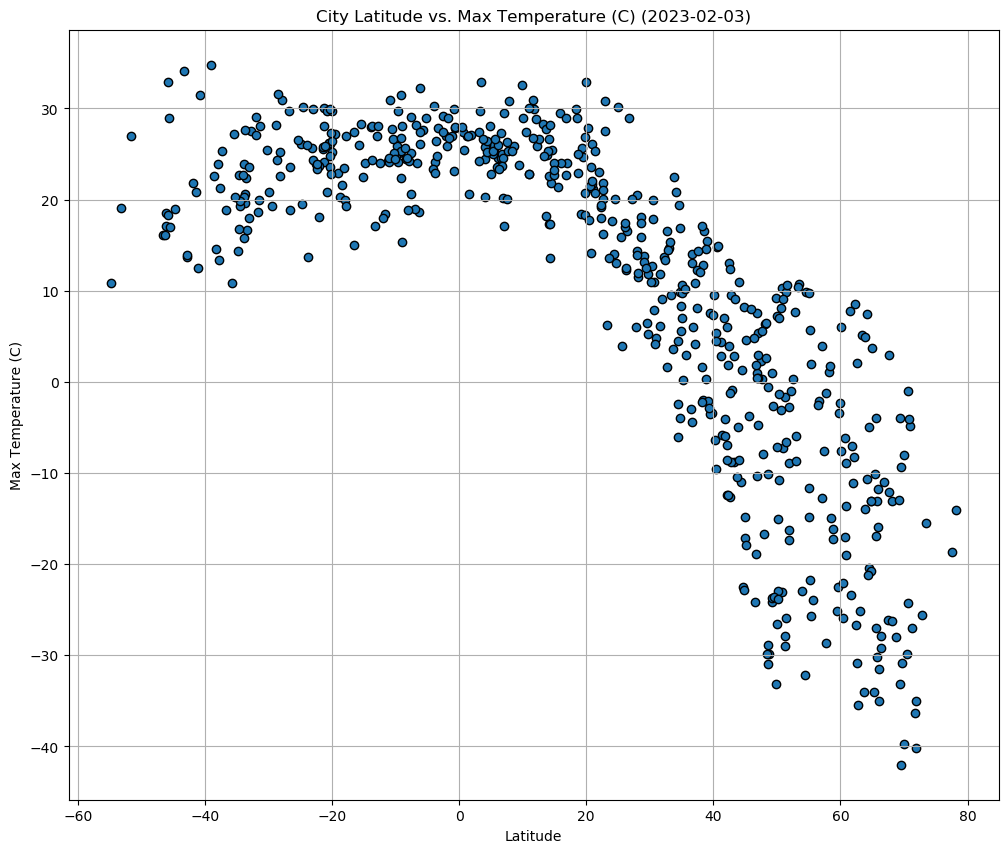

In [144]:
#Build Scatter Plot for Latitude vs. Temperature (Fig 1)
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Latitude vs. Max Temperature (C) ({date.today()})')
plt.grid(visible=True)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches((12,10))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

# (City Latitude vs Max Temperature Plot)----

# The above scatter plot showcase the relationship between Latitude at x-axis vs Max Temperature (F) at the y-axis. This result indicates that there is a higher temperature for cities that are found closer to the equater (Latitude 0),however when you go further north or south from the equator temperatures will decrease.

# Latitude vs. Humidity Plot

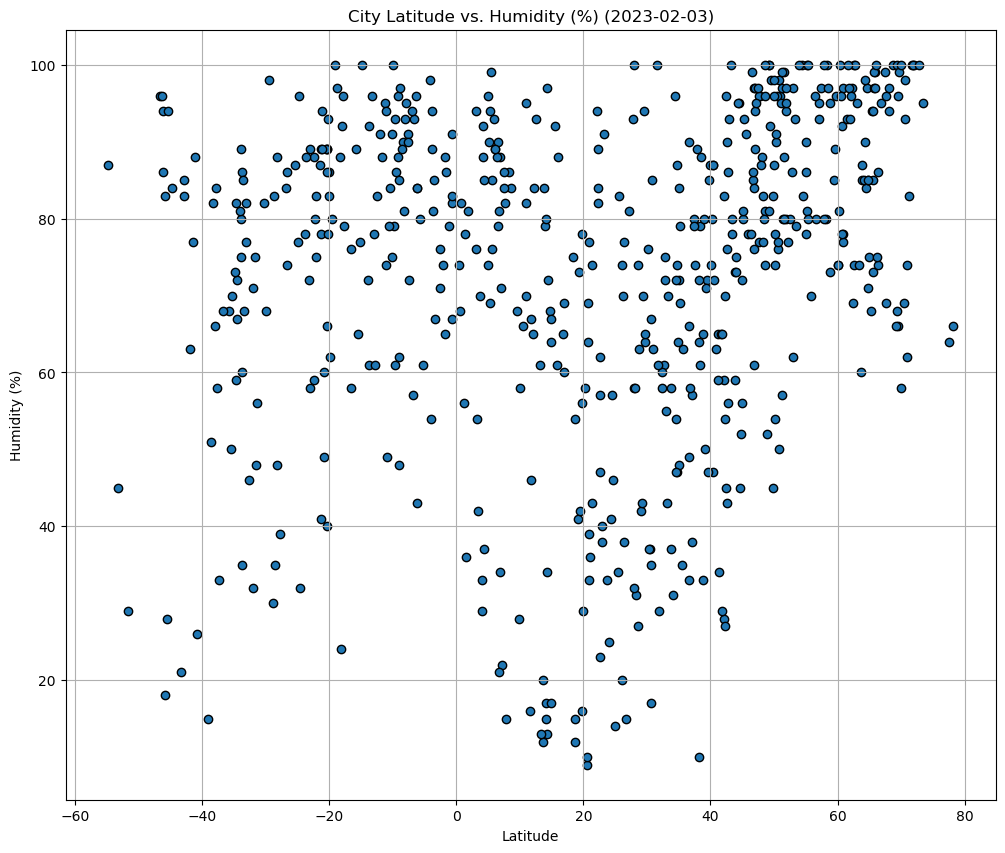

In [145]:
#Build Scatter Plot for Latitude vs. Humidity (Fig 2)
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity (%) ({date.today()})')
plt.grid(visible=True)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches((12,10))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

# (City Latitude vs Humidity Plot)----


# The above scatter plot displays the relationship between Humidity (%) vs. Latitude. From these results we can conclude that humidity is fairly distributed throughout the plots, so we can see that higher humidity levels can occur for cities found near or far from the equator.

# Latitude vs. Cloudiness Plot

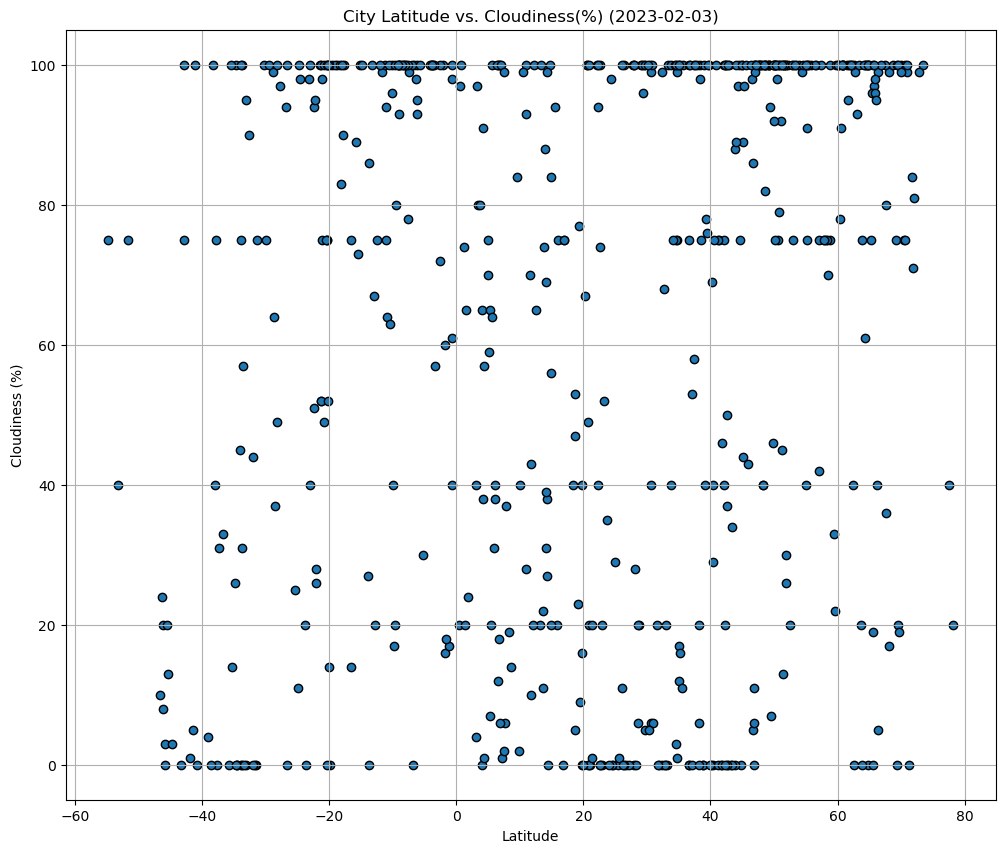

In [146]:
#Build Scatter Plot for Latitude vs. Cloudiness (Fig 3)
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness(%) ({date.today()})')
plt.grid(visible=True)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches((12,10))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

# (City Latitude vs Cloudiness Plot)----

# The above scatter plot shows the relationship between the cloudness and latitude of each city. From these results we can see that the data is evenly distributed, and there is very little difference in cloudiness whether a city is near or far from the equator (Latitude 0).

# Latitude vs. Wind Speed Plot


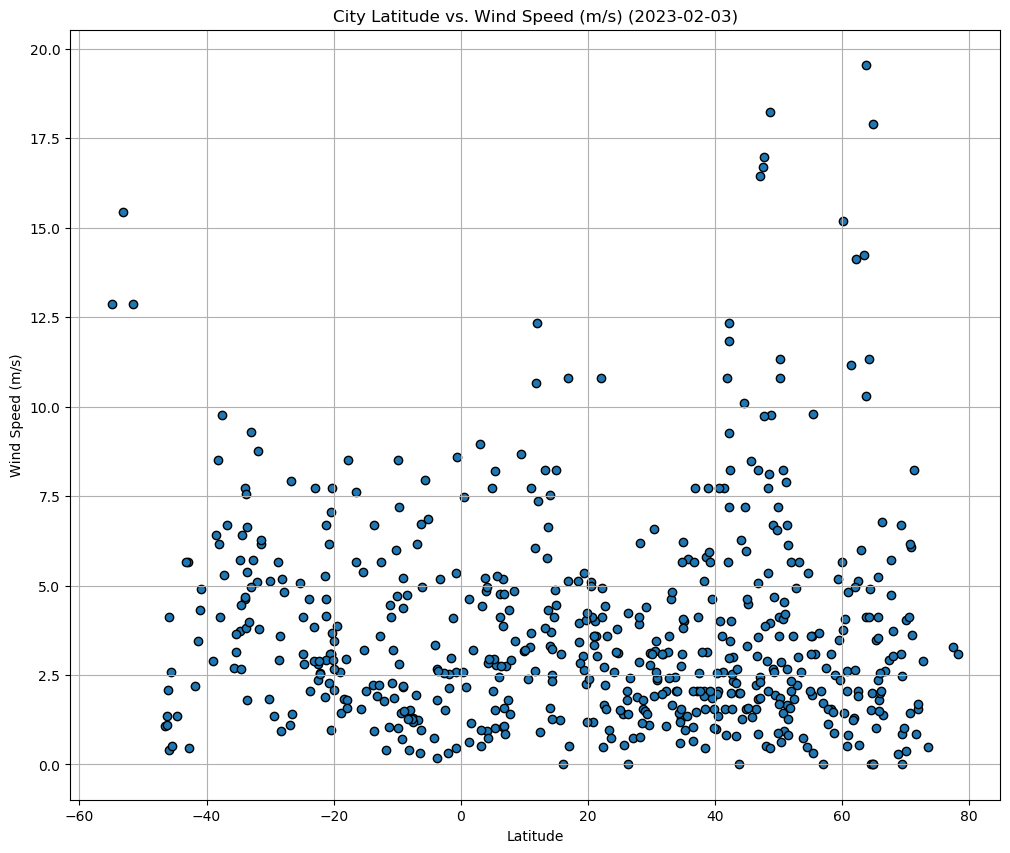

In [147]:
#Build Scatter Plot for Latitude vs. Wind Speed (Fig 4)
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed (m/s) ({date.today()})')
plt.grid(visible=True)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches((12,10))

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

# (City Latitude vs Wind Speed Plot)----
# The above scatter plot shows the relationship between wind speed (mph) and latitude. The plot displays that a lower wind speed occurs when a city is closer to the equater (latitude 0) and that wind speed increases in the cities further from the equator.

# Linear Regression for Each Relationship

In [175]:
# Define a function to create Linear Regression plots
def linreg(x,y):
    slope, intercept, r, p, std_err = linregress(x,y)
    line_eq = slope*x+intercept
    line_str = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,line_eq,'r-')
    plt.gcf().set_size_inches((10,8))
    plt.gcf().set_facecolor('white')
    plt.annotate(line_str,(0.1,0.1),xycoords='axes fraction',fontsize=15,color="red")
    print('The r-value is: '+str(r))
  

In [149]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display Sample Head
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gushikawa,26.3544,127.8686,16.57,77,100,0.00,JP,1675452254
2,la palma,33.8464,-118.0467,22.50,37,40,2.06,US,1675452256
4,butaritari,3.0707,172.7902,27.38,76,4,8.96,KI,1675452259
5,tuktoyaktuk,69.4541,-133.0374,-42.00,66,20,0.00,CA,1675452261
7,bethel,41.3712,-73.4140,-5.80,34,75,7.72,US,1675452262


In [150]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display Sample Head
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port macquarie,-31.4333,152.9167,19.94,48,0,6.16,AU,1675452255
3,ushuaia,-54.8000,-68.3000,10.81,87,75,12.86,AR,1675452111
6,humaita,-7.5061,-63.0208,29.07,72,99,1.31,BR,1675452261
12,port elizabeth,-33.9180,25.5701,23.94,89,75,4.63,ZA,1675452266
13,camapua,-19.5314,-54.0439,27.20,80,100,3.86,BR,1675452267


# Northern Hemisphere - Max Temperature vs. Latitude Linear Regression

The r-value is: -0.8421261809434313
The correlation between both factors is -0.84


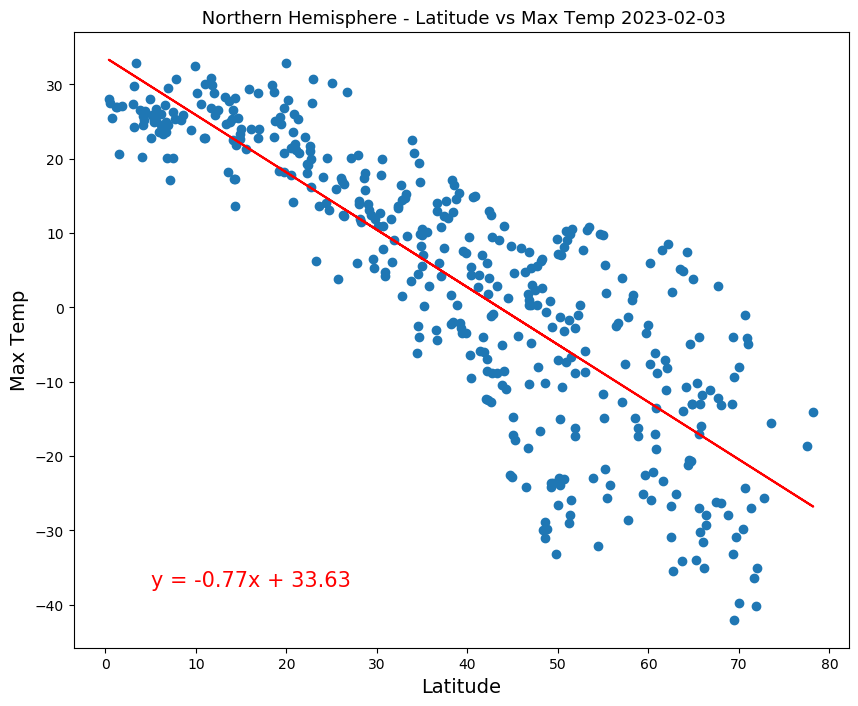

In [189]:
# Linear regression on Northern Hemisphere (LinReg_Temp_Lat)

plt.xlabel('Latitude',fontsize = 14)
plt.ylabel('Max Temp',fontsize = 14)
today = datetime.date(datetime.now())
plt.title(f" Northern Hemisphere - Latitude vs Max Temp {today}",fontsize = 13)
linreg(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
correlation = st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Save the figure
plt.savefig("output_data/NorthLinReg_Temp_Lat.png")
plt.show()

# Southern Hemisphere - Max Temperature vs. Latitude Linear Regression

The r-value is: 0.37989342430681783
The correlation between both factors is 0.38


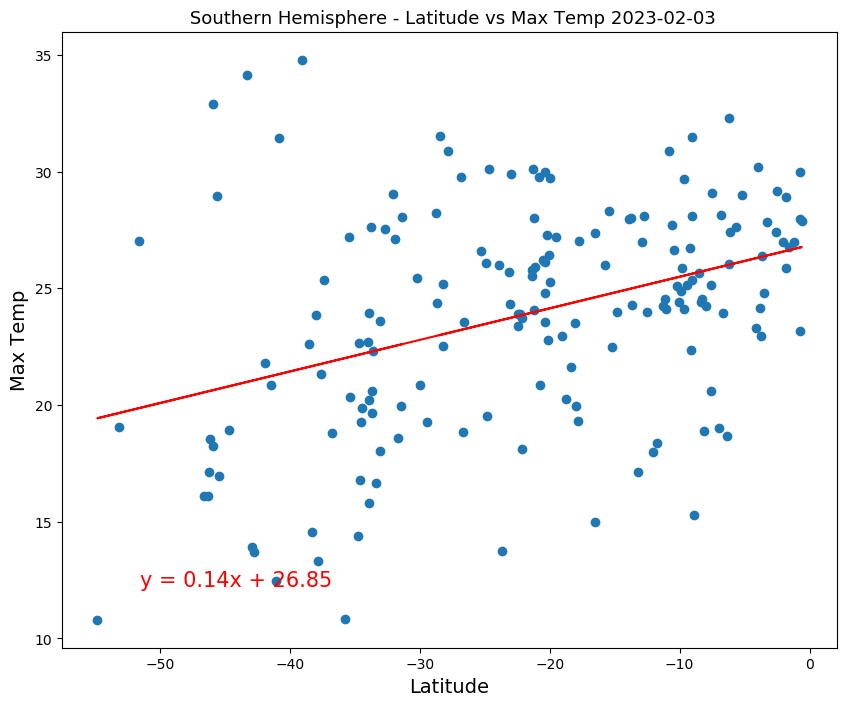

In [183]:
# Linear regression on Southern Hemisphere (LinReg_Temp_Lat) #

plt.xlabel('Latitude',fontsize = 14)
plt.ylabel('Max Temp',fontsize = 14)
today = datetime.date(datetime.now())
plt.title(f" Southern Hemisphere - Latitude vs Max Temp {today}",fontsize = 13)
linreg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
correlation = st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Save the figure
plt.savefig("output_data/SouthLinReg_Temp_Lat.png")
plt.show()

# Discussion: ----
# The plots above are linear regression models between Latitude and Maximum Temperature for Northern & Southern Hemispheric cities. The results from the data show that there is a strong, negative correlation between Maximum Temperature and Latitude. This means when we go further away from the equator (Latitude = 0) the maximum temperature (C) decreases.
# And a linear regression model between maximum temperature and latitude for Southern Hemispheric cities. The result from the data shows that there is a very weak and almost non-existent negative correlation between maximum temperature and latitude in the Southern Hemispheric cities.

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.42531565810700767
The correlation between both factors is 0.43


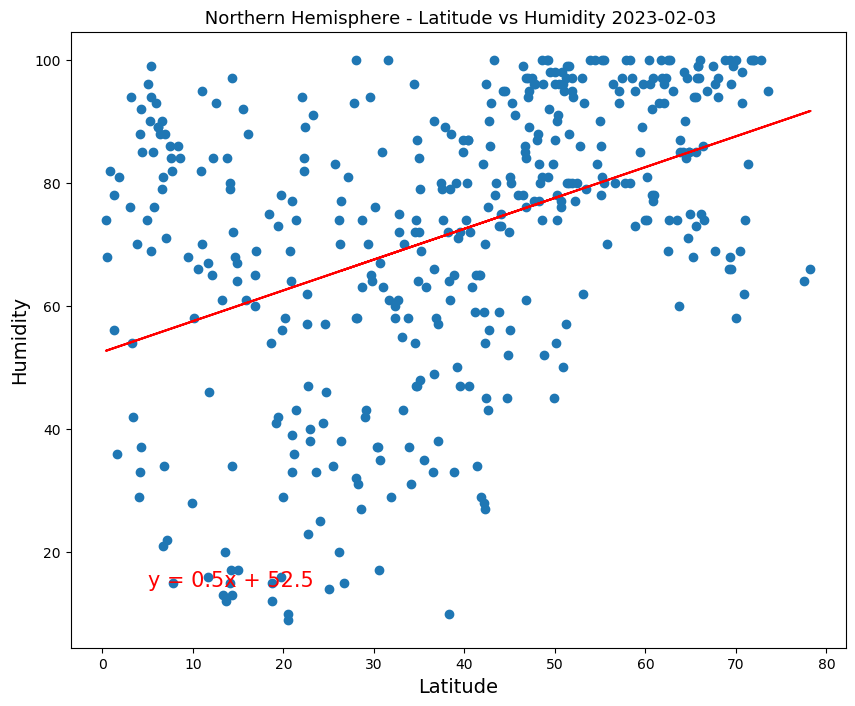

In [185]:
# Linear regression on Northern Hemisphere (LinReg_Humidity_Lat) #

plt.xlabel('Latitude',fontsize = 14)
plt.ylabel('Humidity',fontsize = 14)
today = datetime.date(datetime.now())
plt.title(f" Northern Hemisphere - Latitude vs Humidity {today}",fontsize = 13)
linreg(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
correlation = st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Save the figure
plt.savefig("output_data/NorthLinReg_Lat_Humidity.png")
plt.show()

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3009820127577481
The correlation between both factors is 0.3


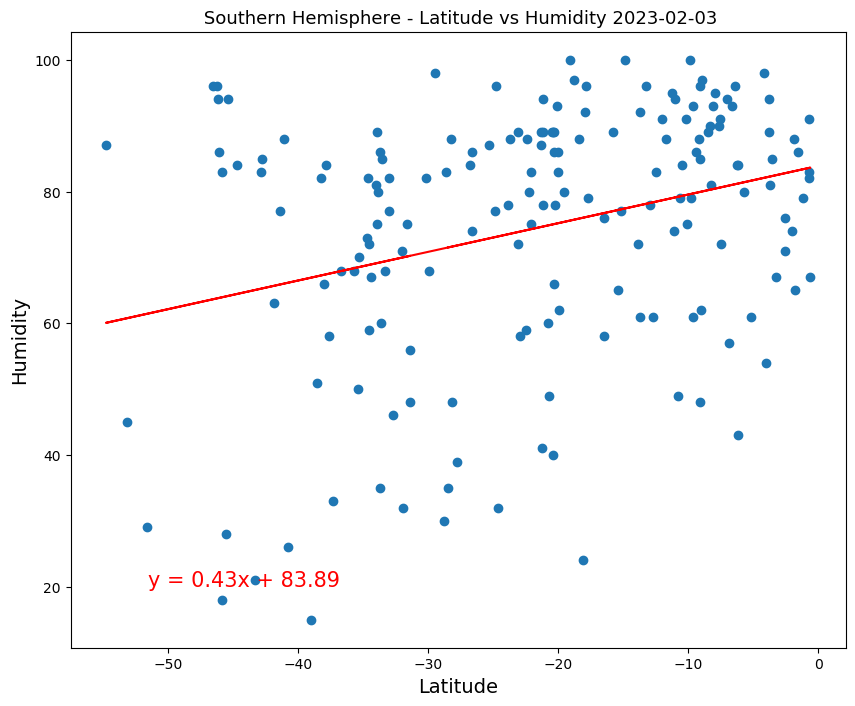

In [186]:
# Linear regression on Southern Hemisphere (SouthLinReg_Humidity_Lat) #

plt.xlabel('Latitude',fontsize = 14)
plt.ylabel('Humidity',fontsize = 14)
today = datetime.date(datetime.now())
plt.title(f" Southern Hemisphere - Latitude vs Humidity {today}",fontsize = 13)
linreg(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
correlation = st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Save the figure
plt.savefig("output_data/SouthLinReg_Lat_Humidity.png")
plt.show()

# Discussion ----
# The above plot is a linear regression model between Humidity (%) and Latitude for Northern Hemisphere cities. The results from the data show that there is a very weak negative correlation between Humidity (%) and Latitude in the Northern Hemispheric cities.

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2951834307732324
The correlation between both factors is 0.3


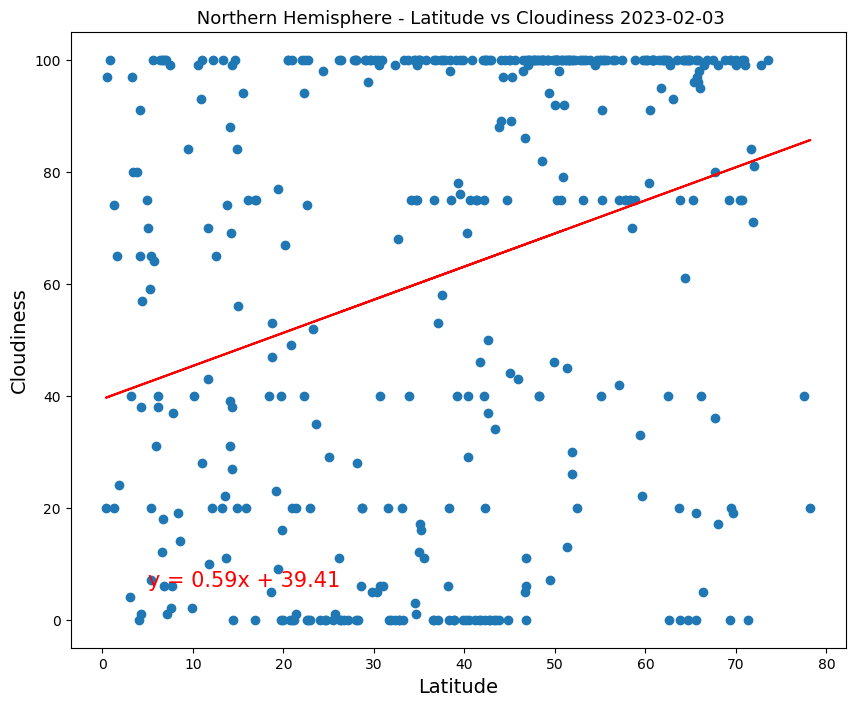

In [188]:
# Linear regression on Northern Hemisphere (LinReg_Cloudiness_Lat) #

plt.xlabel('Latitude',fontsize = 14)
plt.ylabel('Cloudiness',fontsize = 14)
today = datetime.date(datetime.now())
plt.title(f" Northern Hemisphere - Latitude vs Cloudiness {today}",fontsize = 13)
linreg(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
correlation = st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Save the figure
plt.savefig("output_data/NorthLinReg_Lat_Cloudiness.png")
plt.show()

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.4369421870018581
The correlation between both factors is 0.44


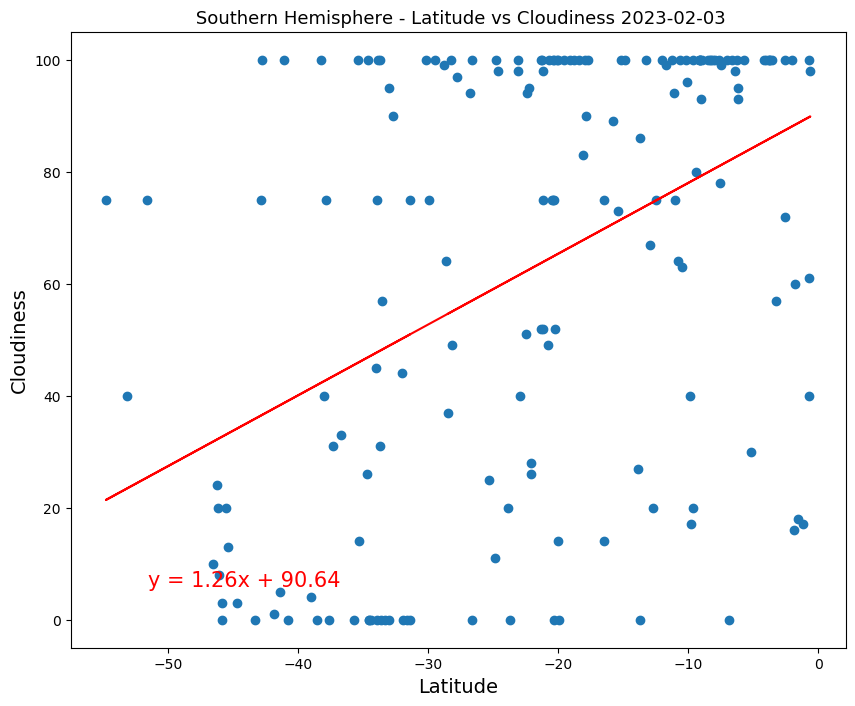

In [195]:
# Linear regression on Southern Hemisphere (LinReg_Cloudiness_Lat) #

plt.xlabel('Latitude',fontsize = 14)
plt.ylabel('Cloudiness',fontsize = 14)
today = datetime.date(datetime.now())
plt.title(f" Southern Hemisphere - Latitude vs Cloudiness {today}",fontsize = 13)
linreg(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
correlation = st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Save the figure
plt.savefig("output_data/SouthLinReg_Lat_Cloudiness.png")
plt.show()

# Discussion ----
# The above plot is a linear regression model between Cloudiness (%) and Latitude for Northern_Hemispheric cities. The results from the data also show that there is a very weak, almost non-existent negative correlation between cloudiness (%) and latitude in the Southern Hemispheric cities.

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04515277490136628
The correlation between both factors is 0.05


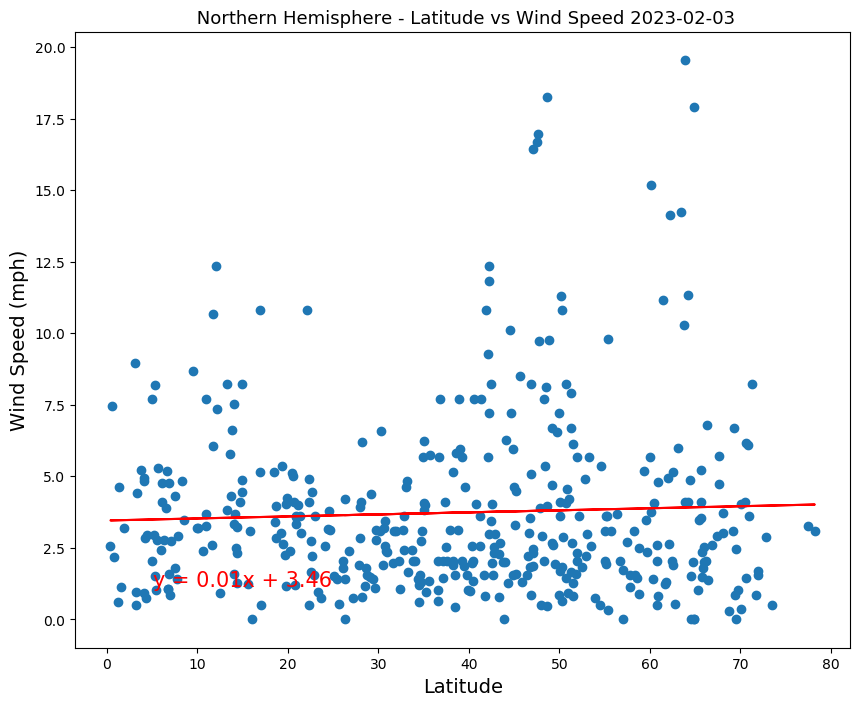

In [192]:
# Linear regression on Northern Hemisphere (LinReg_Windspeed_Lat) #

plt.xlabel('Latitude',fontsize = 14)
plt.ylabel('Wind Speed (mph)',fontsize = 14)
today = datetime.date(datetime.now())
plt.title(f" Northern Hemisphere - Latitude vs Wind Speed {today}",fontsize = 13)
linreg(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
correlation = st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Save the figure
plt.savefig("output_data/NorthLinReg_Lat_WindSpeed.png")
plt.show()

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.30264991032993976
The correlation between both factors is -0.3


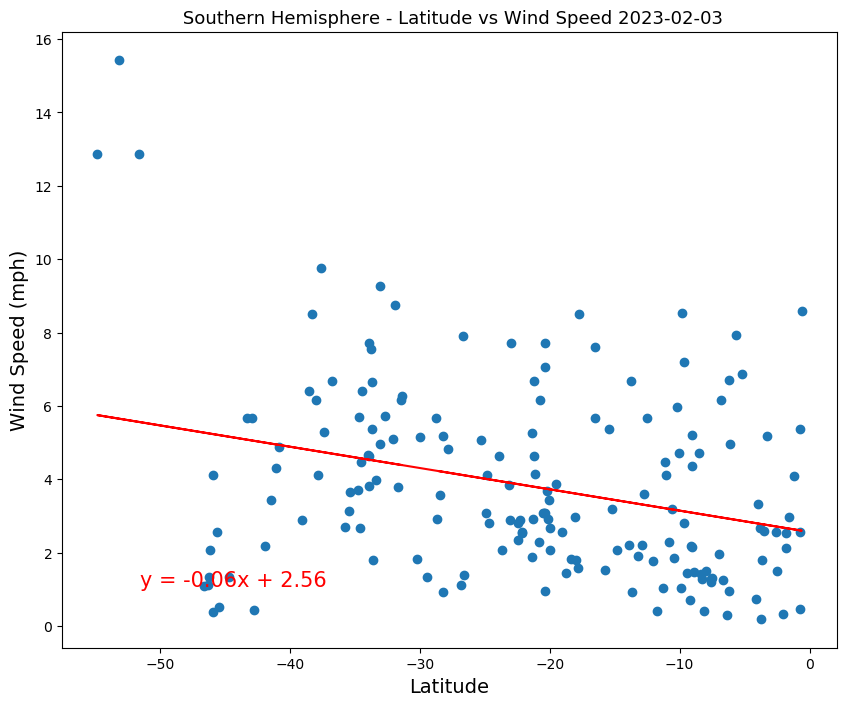

In [193]:
# Linear regression on Southern Hemisphere (LinReg_WindSpeed_Lat) #

plt.xlabel('Latitude',fontsize = 14)
plt.ylabel('Wind Speed (mph)',fontsize = 14)
today = datetime.date(datetime.now())
plt.title(f" Southern Hemisphere - Latitude vs Wind Speed {today}",fontsize = 13)
linreg(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
correlation = st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Save the figure
plt.savefig("output_data/SouthLinReg_Lat_WindSpeed.png")
plt.show()

# Discussion ----
# The above plot is a linear regression model between wind speed (mph), and latitude for Northern_Hemisphere cities. The results from the data show that there is a very weak, almost non-existent positive correlation between wind speed (mph (%) and latitude in Northern Hemispheric cities.

# The above plot is a linear regression model between wind speed (mph), and latitude for Southern Hemisphere. The results from the data show that there is a very weak, negative correlation between wind speed (mph (%) and latitude in the Northern Hemisphere cities.